<a href="https://colab.research.google.com/github/Pakopac/houseNumbers-recognition/blob/master/HouseNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import keras.preprocessing.image as kpi
import os
from matplotlib import pyplot as plt

In [27]:
from tensorflow.python.client import device_lib
MODE = "GPU" if "GPU" in [k.device_type for k in device_lib.list_local_devices()] else "CPU"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/Colab_Notebooks/housenumbers/'

In [ ]:
# !unzip /content/drive/MyDrive/Colab_Notebooks/housenumbers/test.zip -d /content/drive/MyDrive/Colab_Notebooks/housenumbers/

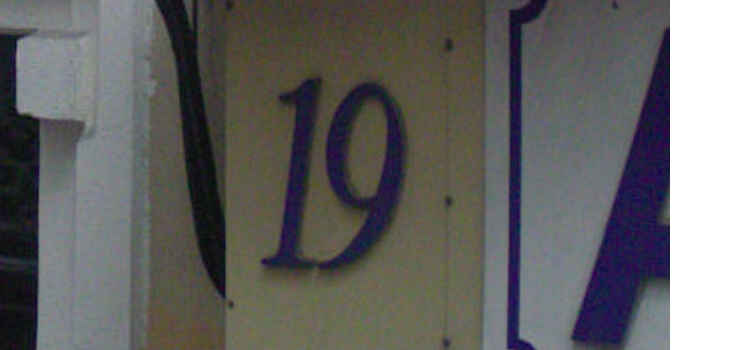

In [28]:
img = kpi.load_img(data_dir+'/train/1.png')  # this is a PIL image
img

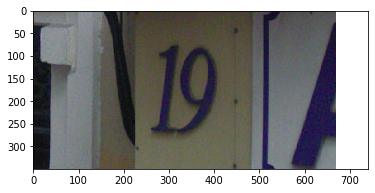

In [33]:
x = kpi.img_to_array(img)  
plt.imshow(x/255, interpolation='nearest')
plt.show()

In [38]:
x_0 = kpi.img_to_array(kpi.load_img(data_dir+"/train/1.png"))
x_1 = kpi.img_to_array(kpi.load_img(data_dir+"/train/2.png"))
x_0.shape, x_1.shape

((350, 741, 3), (83, 199, 3))

In [34]:
datagen = kpi.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [35]:
img_width = 150
img_height = 150

img = kpi.load_img(data_dir+"/train/1.png")
x = kpi.img_to_array(img)  
x_ = x.reshape((1,) + x.shape)

if not(os.path.isdir(data_dir+"/preprocessing_example")):
    os.mkdir(data_dir+"/preprocessing_example")

    i = 0
    for batch in datagen.flow(x_, batch_size=1,save_to_dir=data_dir+"/preprocessing_example", save_prefix='number', save_format='png'):
        i += 1
        if i > 8:
            break  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


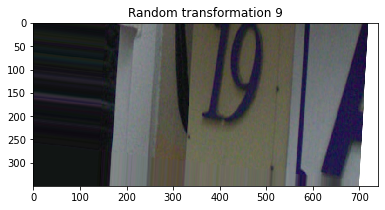

In [36]:
X_list=[]
for f in os.listdir(data_dir+"/preprocessing_example"):
    X_list.append(kpi.img_to_array(kpi.load_img(data_dir+"/preprocessing_example/"+f)))

fig=plt.figure(figsize=(16,8))
fig.patch.set_alpha(0)
ax = fig.add_subplot(3,3,1)
ax.imshow(x/255, interpolation="nearest")
ax.set_title("Image original")
for i,xt in enumerate(X_list):
    ax = fig.add_subplot(3,3,1)
    ax.imshow(xt/255, interpolation="nearest")
    ax.set_title("Random transformation %d" %(i+1))
plt.tight_layout()
plt.savefig("number_transformation.png", dpi=100, bbox_to_anchor="tight", facecolor=fig.get_facecolor())
plt.show()

In [46]:
train_datagen = kpi.ImageDataGenerator(
        rescale=1./255,
)
valid_datagen = kpi.ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory( data_dir + "/train/",
                                   target_size=(256, 256),
                                   color_mode="rgb",
                                   classes=None,
                                   class_mode="categorical",
                                   batch_size=32,
                                   shuffle=True,
                                   seed=123,    
                                   subset='training' )  
valid_gen=valid_datagen.flow_from_directory( data_dir +"/test/",
                                   target_size=(256, 256),
                                   color_mode="rgb",
                                   classes=None,
                                   class_mode="categorical",
                                   batch_size=32,                                   
                                   shuffle=False, 
                                   subset='validation' )


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
